In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt # Core plotting support
import pandas as pd
import seaborn as sb
NaN = np.nan

## File structure
The following cells follow the structure:
* Manually-typed organized data for one plot
* Cells that plot one aspect of the data
* Cells that plot another aspect of the data
* ...
* Empty cell
* Cell that loads data from another experiment
* Repeat...

In [2]:
# Create tables to record data between unbalanced-ness and sharing percentage
# Data arrangement: [Different S (sharing) [Different U (unbalanced-ness) [t95, t98, t99] ] ]
US_A_data = np.array([
    # S=0:
    [
        # U=0:
        [2,6,26],
        # U=0.5, 0.8, 0.9, 1.0
        [3,8,40], [4,13,87], [5,18,124], [NaN,NaN,NaN]
    ],
    # S=0.1, 0.5, 1, 2
    [
        [2,6,27], [2,6,35], [3,10,79], [4,14,90], [6,9,151]
    ],
    [
        [2,5,35], [2,6,26], [2,6,34], [2,7,37], [3,8,46]
    ],
    [
        [2,5,27], [2,5,30], [2,6,29], [2,6,26], [2,7,36]
    ],
    [
        [2,5,21], [2,5,29], [2,5,26], [2,6,23], [2,6,23]
    ]
])
US_B1_data = np.array([
    [
        [2,7,34], [2,8,37], [4,14,74], [5,26,216], [NaN,NaN,NaN]
    ],
    [
        [2,6,28], [2,8,41], [3,10,65], [3,13,83], [4,20,117]
    ],
    [
        [2,5,26], [2,6,33], [2,7,37], [2,8,47], [2,8,41]
    ],
    [
        [2,6,28], [2,6,31], [1,6,38], [2,6,35], [2,7,45]
    ],
    [
        [2,6,24], [2,6,30], [2,6,27], [2,6,37], [2,6,32]
    ]
])
US_D45_data = np.array([
    [
        [2,8,49], [3,10,51], [4,7,NaN], [6,26,320], [NaN,NaN,NaN]
    ],
    [
        [2,7,45], [3,9,50], [3,12,75], [4,17,162], [6,27,NaN]
    ],
    [
        [2,7,41], [2,7,43], [3,10,52], [3,10,58], [3,12,61]
    ],
    [
        [2,7,41], [2,7,52], [2,8,54], [2,8,46], [3,8,55]
    ],
    [
        [2,7,40], [2,7,31], [2,7,43], [2,7,43], [2,8,50]
    ]
])
US_A_maxdata = np.array([
    # For each S, the list contains max accurarcy at each U
    [83.02, 99.18, 99.11, 99.26, 99.35], 
    [99.01, 99.24, 99.18, 99.3, 99.36],
    [99.34, 99.31, 99.31, 99.36, 99.37],
    [99.32, 99.35, 99.29, 99.31, 99.39],
    [99.36, 99.26, 99.34, 99.33, 99.37]
])
US_B1_maxdata = np.array([
    # For each S, the list contains max accurarcy at each U
    [79.28, 99.02, 99.08, 99.28, 99.25], 
    [99.09, 99.18, 99.18, 99.26, 99.28],
    [99.26, 99.24, 99.25, 99.29, 99.32],
    [99.22, 99.29, 99.29, 99.27, 99.3],
    [99.33, 99.34, 99.27, 99.26, 99.3]
])
US_D45_maxdata = np.array([
    # For each S, the list contains max accurarcy at each U
    [68.96, 99, 98.98, 99.26, 99.27], 
    [98.98, 99.08, 99.15, 99.23, 99.33],
    [99.21, 99.27, 99.22, 99.32, 99.31],
    [99.25, 99.3, 99.23, 99.26, 99.33],
    [99.26, 99.34, 99.27, 99.31, 99.27]
])
unitlength = len(US_D45_maxdata.ravel())
US_df = pd.DataFrame(data={
    't95': np.apply_along_axis( lambda x : x[0], axis=2, arr=np.concatenate((US_A_data,US_B1_data,US_D45_data)) ).ravel(),
    't98': np.apply_along_axis( lambda x : x[1], axis=2, arr=np.concatenate((US_A_data,US_B1_data,US_D45_data)) ).ravel(),
    't99': np.apply_along_axis( lambda x : x[2], axis=2, arr=np.concatenate((US_A_data,US_B1_data,US_D45_data)) ).ravel(),
    'max': np.concatenate((US_A_maxdata,US_B1_maxdata,US_D45_maxdata)).ravel(),
    'type': (['A']*unitlength)+(['B1']*unitlength)+(['D45']*unitlength),
    'S': np.array([[0]*5 + [0.1]*5 + [0.5]*5 + [1]*5 + [2]*5]*3).ravel(),
    'U': np.array([[0,0.5,0.8,0.9,1.0]*15]).ravel()
})
# But seaborn can't plot 3D
# US_df.pivot_table

In [3]:
# Custom color maps for each category, to manifest geological differences on the plot.
# https://matplotlib.org/stable/gallery/color/custom_cmap.html
cdict_wireframe = {
    'e95': (  (0,0,0.8),
              (0.2,0.2,1.0) ), 
    'e98': (  (0,0.8,0),
              (0.2,1.0,0.2) ), 
    'e99': (  (0.8,0.4,0),
              (1.0,0.7,0.2) ) 
}
# plt.register_cmap(cmap=mpl.colors.LinearSegmentedColormap('e95', cdict_wireframe))
# plt.register_cmap(cmap=mpl.colors.LinearSegmentedColormap('e98', cdict_wireframe))
# plt.register_cmap(cmap=mpl.colors.LinearSegmentedColormap('e99', cdict_wireframe))
cmap95 = mpl.colors.LinearSegmentedColormap.from_list('e95', [(0.2,0.2,0.8),
              (0.5,0.2,1.0)], N=100)
cmap98 = mpl.colors.LinearSegmentedColormap.from_list('e98', [(0,0.8,0),
              (0.2,1.0,0.2)], N=100)
cmap99 = mpl.colors.LinearSegmentedColormap.from_list('e99', [(0.8,0.4,0),
              (1.0,0.7,0.2)], N=100)
plt.register_cmap(cmap=cmap95)
plt.register_cmap(cmap=cmap98)
plt.register_cmap(cmap=cmap99)

### The following cells experiments with color settings, and were mainly failing. Skip to the next header.

In [51]:
# Colormap is able to produce the corresponding transient color when given a number in [0,100]:
cmap99([0,43,77,100])

array([[0.8       , 0.4       , 0.        , 1.        ],
       [0.88686869, 0.53030303, 0.08686869, 1.        ],
       [0.9959596 , 0.69393939, 0.1959596 , 1.        ],
       [1.        , 0.7       , 0.2       , 1.        ]])

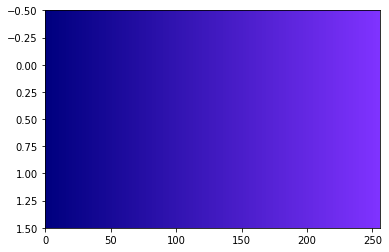

In [45]:
%matplotlib inline 
plt.imshow(np.vstack((np.arange(256),np.arange(256))), aspect='auto', cmap=plt.get_cmap('e95'))

In [4]:
# To plot a 3D surface:
%matplotlib qt  
# %matplotlib inline 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
U,S = np.meshgrid([0,0.5,0.8,0.9,1.0], [0,0.1,0.5,1,2])
# Use plot_wireframe to plot the grid only. Only problem is that wireframe only uses one single color.
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
# We still have to go back to using plot_surface in the end.
# surf = ax.plot_wireframe(S,U,US_A_data[:,:,0], cmap=plt.get_cmap('e95')) # plot_surface
# surf = ax.plot_wireframe(S,U,US_A_data[:,:,1], cmap=plt.get_cmap('e98'))
# surf = ax.plot_wireframe(S,U,US_A_data[:,:,2], cmap=plt.get_cmap('e99'))
# surf = ax.plot_surface(S,U,US_A_data[:,:,0], cmap=plt.get_cmap('e95')) 
# surf = ax.plot_surface(S,U,US_A_data[:,:,1], cmap=plt.get_cmap('e98'))
# surf = ax.plot_surface(S,U,US_A_data[:,:,2], cmap=plt.get_cmap('e99'))
color_normU = np.array([[0,25,50,75,100]]*5).T
colors95 = cmap95(color_normU)#(U*100)
surf95 = ax.plot_surface(S,U,US_A_data[:,:,0], linewidth=5, 
                       rcount=colors95.shape[0], ccount=colors95.shape[1], 
                      facecolors=colors95, shade=False) 
surf95.set_facecolor((0,0,0,0))
colors98 = cmap98(color_normU)#(U*100)
surf98 = ax.plot_surface(S,U,US_A_data[:,:,1], linewidth=5, 
                       rcount=colors98.shape[0], ccount=colors98.shape[1], 
                      facecolors=colors98, shade=False) 
surf98.set_facecolor((0,0,0,0))
colors99 = cmap99(color_normU)#(U*100)
surf99 = ax.plot_surface(S,U,US_A_data[:,:,2], linewidth=5, 
                       rcount=colors99.shape[0], ccount=colors99.shape[1], 
                      facecolors=colors99, shade=False) 
surf99.set_facecolor((0,0,0,0))
ax.set_xlabel('Sum of shared portions of each client')
ax.set_ylabel('Unbalanced-ness: Percentage of majority class samples')
ax.set_zlabel('Number of epochs')
ax.set_zscale('log')
ax.set_title(r'$e_{95}, e_{98}, e_{99}$ for optimizer Adam')
# Not running legend because of weird bug
# ax._facecolors2d = ax._facecolor
# ax._edgecolors2d = ax._facecolor
# plt.legend(handles=[surf95,surf98,surf99], labels=[r'$e_{95}$', r'$e_{98}$', r'$e_{99}$'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Z contains NaN values. This may result in rendering artifacts.


Text(0.5, 0.92, '$e_{95}, e_{98}, e_{99}$ for optimizer Adam')

In [5]:
plt.cla()
surf95 = ax.plot_surface(S,U,US_B1_data[:,:,0], linewidth=5, 
                       rcount=colors95.shape[0], ccount=colors95.shape[1], 
                      facecolors=colors95, shade=False) 
surf95.set_facecolor((0,0,0,0))
surf98 = ax.plot_surface(S,U,US_B1_data[:,:,1], linewidth=5, 
                       rcount=colors98.shape[0], ccount=colors98.shape[1], 
                      facecolors=colors98, shade=False) 
surf98.set_facecolor((0,0,0,0))
surf99 = ax.plot_surface(S,U,US_B1_data[:,:,2], linewidth=5, 
                       rcount=colors99.shape[0], ccount=colors99.shape[1], 
                      facecolors=colors99, shade=False) 
surf99.set_facecolor((0,0,0,0))
ax.set_xlabel('Sum of shared portions of each client')
ax.set_ylabel('Unbalanced-ness: Percentage of majority class samples')
ax.set_zlabel('Number of epochs')
ax.set_zscale('log')
ax.set_title(r'$e_{95}, e_{98}, e_{99}$ for optimizer Adadelta')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  if sys.path[0] == '':


In [6]:
plt.cla()
surf95 = ax.plot_surface(S,U,US_D45_data[:,:,0], linewidth=5, 
                       rcount=colors95.shape[0], ccount=colors95.shape[1], 
                      facecolors=colors95, shade=False) 
surf95.set_facecolor((0,0,0,0))
surf98 = ax.plot_surface(S,U,US_D45_data[:,:,1], linewidth=5, 
                       rcount=colors98.shape[0], ccount=colors98.shape[1], 
                      facecolors=colors98, shade=False) 
surf98.set_facecolor((0,0,0,0))
surf99 = ax.plot_surface(S,U,US_D45_data[:,:,2], linewidth=5, 
                       rcount=colors99.shape[0], ccount=colors99.shape[1], 
                      facecolors=colors99, shade=False) 
surf99.set_facecolor((0,0,0,0))
ax.set_xlabel('Sum of shared portions of each client')
ax.set_ylabel('Unbalanced-ness: Percentage of majority class samples')
ax.set_zlabel('Number of epochs')
ax.set_zscale('log')
ax.set_title(r'$e_{95}, e_{98}, e_{99}$ for optimizer RMSprop')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  if sys.path[0] == '':


In [85]:
print(surf95.__dict__.keys())

dict_keys(['_stale', 'stale_callback', '_axes', 'figure', '_transform', '_transformSet', '_visible', '_animated', '_alpha', 'clipbox', '_clippath', '_clipon', '_label', '_picker', '_contains', '_rasterized', '_agg_filter', '_mouseover', 'eventson', '_oid', '_propobservers', '_remove_method', '_url', '_gid', '_snap', '_sketch', '_path_effects', '_sticky_edges', '_in_layout', '_A', 'norm', 'cmap', 'colorbar', 'callbacksSM', '_update_dict', '_us_linestyles', '_linestyles', '_us_lw', '_linewidths', '_is_filled', '_hatch_color', '_original_facecolor', '_facecolors', '_facecolors3d', '_original_edgecolor', '_is_stroked', '_edgecolors', '_edgecolors3d', '_antialiaseds', '_pickradius', '_urls', '_hatch', '_offset_position', 'zorder', '_capstyle', '_joinstyle', '_offsets', '_offsetsNone', '_uniform_offsets', '_paths', '_sizes', '_transforms', '_vec', '_segslices', '_closed', '_zsortfunc', '_sort_zpos', '_codes3d', '_facecolors2d', '_edgecolors2d'])


## The following cells plot different aspects of the data above.
Use wireframe to plot a trend with 2 varying values. Wireframe was used instead of surface, so that the values aren't obstructed.

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
ax.plot_wireframe(S,U,US_A_data[:,:,0], color='blue') 
ax.plot_wireframe(S,U,US_B1_data[:,:,0], color='green') 
ax.plot_wireframe(S,U,US_D45_data[:,:,0], color='red')
ax.set_xlabel('Sum of shared portions of each client')
ax.set_ylabel('Unbalanced-ness: Percentage of majority class samples')
ax.set_zlabel('Number of epochs')
ax.set_zscale('log')
ax.legend(['Adam', 'Adadelta', 'RMSprop'])
ax.set_title(r'$e_{95}$ for different optimizers')

Text(0.5, 0.92, '$e_{95}$ for different optimizers')

In [8]:
plt.cla()
ax.plot_wireframe(S,U,US_A_data[:,:,1], color='blue') 
ax.plot_wireframe(S,U,US_B1_data[:,:,1], color='green') 
ax.plot_wireframe(S,U,US_D45_data[:,:,1], color='red')
ax.set_xlabel('Sum of shared portions of each client')
ax.set_ylabel('Unbalanced-ness: Percentage of majority class samples')
ax.set_zlabel('Number of epochs')
ax.set_zscale('log')
ax.legend(['Adam', 'Adadelta', 'RMSprop'])
ax.set_title(r'$e_{98}$ for different optimizers')

Text(0.5, 0.92, '$e_{98}$ for different optimizers')

In [11]:
plt.cla()
ax.plot_wireframe(S,U,US_A_data[:,:,2], color='blue') 
ax.plot_wireframe(S,U,US_B1_data[:,:,2], color='green') 
ax.plot_wireframe(S,U,US_D45_data[:,:,2], color='red')
ax.set_xlabel('Sum of shared portions of each client')
ax.set_ylabel('Unbalanced-ness: Percentage of majority class samples')
ax.set_zlabel('Number of epochs')
ax.set_zscale('log')
ax.legend(['Adam', 'Adadelta', 'RMSprop'])
ax.set_title(r'$e_{99}$ for different optimizers')

Text(0.5, 0.92, '$e_{99}$ for different optimizers')

In [12]:
plt.cla()
Ur,S = np.meshgrid([1.0,0.9,0.8,0.5,0], [0,0.1,0.5,1,2])
ax.plot_wireframe(S,Ur,US_A_maxdata, color='blue') 
ax.plot_wireframe(S,Ur,US_B1_maxdata, color='green') 
ax.plot_wireframe(S,Ur,US_D45_maxdata, color='red')
ax.set_xlabel('Sum of shared portions of each client')
ax.set_ylabel('Unbalanced-ness: Percentage of majority class samples')
ax.set_zlabel('Maximum test accuracy (%)')
# ax.set_zscale('log')
ax.set_zlim([98.9,99.4])
ax.legend(['Adam', 'Adadelta', 'RMSprop'])
ax.set_title('Maximum testing accuracy for different optimizers')

Text(0.5, 0.92, 'Maximum testing accuracy for different optimizers')

## Load data for another set of experiment

In [21]:
# Completely skewed data with sharing
U1_S049_maxdata = np.array([
    # S = 0
    [
        # A,B,C,D,E
        96.12,95.38,85.1,93.9,94.33
    ],
    # S=4
    [99.28,99.24,98.14,99.17,97.38],
    # S=9 (full)
    [99.26,99.24,98.2,99.18,97.43]
])
U1_S_E005_diffinit_maxdata = np.array([
    # S=0; A,B,C,D,E
    [93.59,81.47,29.2,62.87,92.27],
    # S=0.5
    [98.78,98.82,93.17,97.71,96.11],
    # S=1
    [98.95,98.72,93.64,98.15,96.34],
    # S=2
    [99.05,98.97,94.89,98.04,96.51],
    # S=4
    [99.05,99.05,94.61,98.75,96.35],
    # S=9 (full)
    [99.17,99.11,94.67,98.9,96.36]
])
U1_S_E005_maxdata = np.array([
    # S = 0
    [
        # A,B,C,D,E
        96.12,95.38,85.1,93.9,94.33
    ],
    # S=0.01
    [98.27,98.73,88.17,97.62,94.61],
    # S=0.05
    [98.8,98.95,92.88,98.55,95.37],
    # S=0.1
    [98.94,99.02,94.48,98.79,95.75],
    # S=0.2
    [99.01,99.01,95.77,98.8,96.29],
    # S=0.5
    [99.13,99.08,96.8,99.0,96.91],
    # S=1
    [99.2,99.13,98.01,99.04,97.11],
    # S=2
    [99.27,99.11,97.71,99.11,97.24],
    # S=4
    [99.28,99.24,98.14,99.17,97.38],
    # S=9 (full)
    [99.26,99.24,98.2,99.18,97.43]
])
U1_S_E1_maxdata = np.array([
    # S = 0
    [79.13,96.29,21.93,87.11,94.48],
    # S=0.1
    [99.16,99.11,98.55,99.09,98.79],
    # S=0.5
    [99.35,99.33,98.96,99.31,99.11],
    # S=1
    [99.35,99.34,98.97,99.38,99.16],
    # S=2
    [99.38,99.4,99.1,99.37,99.18]
])

### Still plotting in the 3D plot used above, but this cell specifies the Y position for different types of data. The result is 2D plots displayed together.

In [40]:
# Plot ones with same initial conditions
plt.cla()
color_list = ['red','blue','green','purple','orange'] # Each color for an optimizer
opt_list = ['Adam', 'Adagrad', 'Adadelta', 'RMSprop', 'SGD']
for i in range(5):
    # Plot ones with same initial conditions
    ax.plot(np.array([0,0.01,0.05,0.1,0.2,0.5,1,2,4,9])+0.001, 
            [0]*10, #['E=0.05, same initial conditions']*10,
            U1_S_E005_maxdata[:,i], color=color_list[i], label=opt_list[i])
ax.set_xlabel('Sum of shared portions of each client')
ax.set_zlabel('Maximum test accuracy (%)')
ax.set_yticks([0,1,2])
ax.set_zlim([88,100])
ax.set_ylim([-4,6])
ax.set_yticklabels(["E=0.05, same initial conditions","E=0.05, different initial conditions","E=1, same initial conditions"])
# ax.set_zlim([98.9,99.4])
ax.legend()#opt_list)
for i in range(5):
    # Plot ones with different initial conditions
    ax.plot(np.array([0,0.5,1,2,4,9])+0.001, 
            [1]*6, #['E=0.05, same initial conditions']*6,
            U1_S_E005_diffinit_maxdata[:,i], color=color_list[i], label=opt_list[i])
    # Plot ones with less frequent updates
    ax.plot(np.array([0,0.1,0.5,1,2])+0.001, 
            [2]*5, #['E=1, same initial conditions']*5,
            U1_S_E1_maxdata[:,i], color=color_list[i], label=opt_list[i])
ax.set_title('Maximum testing accuracy for different optimizers')
ax.set_xscale('log')

In [55]:
# Or just plot it in 2D, which might be easier...
fig2, ax2 = plt.subplots(figsize=(4,6))
color_list = ['red','blue','green','purple','orange'] # Each color for an optimizer
opt_list = ['Adam', 'Adagrad', 'Adadelta', 'RMSprop', 'SGD']
for i in range(5):
    # Plot ones with same initial conditions
    ax2.plot(np.array([0,0.01,0.05,0.1,0.2,0.5,1,2,4,9])+0.001, 
            U1_S_E005_maxdata[:,i], color=color_list[i], label=opt_list[i])
ax2.set_xlabel('Sum of shared portions of each client')
ax2.set_ylabel('Maximum test accuracy (%)')
ax2.set_ylim([92,100])
ax2.set_xlim([0.005,10.5])
ax2.legend()
ax2.set_title('Maximum testing accuracy for different optimizers\n with E=0.05, same initial conditions')
ax2.set_xscale('log')

In [49]:
plt.cla()
for i in range(5):
    # Plot ones with same initial conditions
    ax2.plot(np.array([0,0.5,1,2,4,9])+0.001, 
            U1_S_E005_diffinit_maxdata[:,i], color=color_list[i], label=opt_list[i])
ax2.set_xlabel('Sum of shared portions of each client')
ax2.set_ylabel('Maximum test accuracy (%)')
ax2.set_ylim([77,100])
ax2.set_xlim([0.005,10.5])
ax2.legend()
ax2.set_title('Maximum testing accuracy for different optimizers\n with E=0.05, different initial conditions')
ax2.set_xscale('log')

In [53]:
plt.cla()
for i in range(5):
    # Plot ones with same initial conditions
    ax2.plot(np.array([0,0.1,0.5,1,2])+0.001, 
            U1_S_E1_maxdata[:,i], color=color_list[i], label=opt_list[i])
ax2.set_xlabel('Sum of shared portions of each client')
ax2.set_ylabel('Maximum test accuracy (%)')
ax2.set_ylim([92,100])
ax2.set_xlim([0.05,2.5])
ax2.legend()
ax2.set_title('Maximum testing accuracy for different optimizers\n with E=1, same initial conditions')
ax2.set_xscale('log')

In [16]:
# First try in segmented FL (0205), recording max accuracy
seg0205_data = np.array([
    # K=10, R=2
    # e90, e93, e95, e96, e97, e97.5, e98, e98.5
    [4, 6, 9, 14, 34, 69, NaN, NaN],
    # K=30, R=3
    [9, 9, 18, 26, 46, 84, NaN, NaN],
    # K=50, R=3
    [10, 16, 25, 35, 61, 89, 171, NaN],
    # K=10?50? R=3
    [4, 5, 8, 13, 26, 43, NaN, NaN],
    # K=10, E=1, R=3
    [1,1,1,1,2,3,4,6], #e99 = 16
    # K=10, E=1, R=3, avg instead of max
    [1,1,1,2,2,3,4,7] # e99 = 22
])
seg0205_maxdata = np.array([
    97.82, 97.89, 98.01, 97.92, 99.39, 99.314
])
seg0205_maxinds = np.array([
    194, 185, 188, 169, 155, 188
])

In [34]:
fig3, ax3 = plt.subplots(figsize=(4,6))
# plt.cla()
color_list = ['red','blue','green','orange','purple'] # Each color for an optimizer
for i in range(4):
    ax3.plot(np.arange(6), 
            seg0205_data[i,:6], color=color_list[i])
ax3.plot(np.arange(9), 
         np.array([1,1,1,1,2,3,4,6,16])*20, color=color_list[4])
ax3.set_ylabel('Number of epochs')
# ax3.set_yscale('log')
ax3.set_xticks([0,1,2,3,4,5,6,7,8])
ax3.set_xticklabels([r'$e_{90}$',r'$e_{93}$',r'$e_{95}$',r'$e_{96}$',r'$e_{97}$',r'$e_{97.5}$',r'$e_{98}$',r'$e_{98.5}$',r'$e_{99}$'])
ax3.set_yticks(np.arange(0,101,4), minor=True)
ax3.legend([r'$K=10, R=2$',r'$K=30, R=3$',r'$K=50, R=3$',r'$K=10, R=3$',r'$K=10, R=3, E=1$'])
ax3.set_title('Epoch thresholds when E=0.05')
plt.grid(which='minor', alpha=0.5)
plt.grid(which='major', alpha=0.8)

### Bar plots when values are mostly discrete 

In [31]:
plt.cla()
ax3.bar(np.arange(5), 
        seg0205_maxdata[:5],
        color=['red','blue','green','orange','purple'],
        tick_label=[r'$K=10$,'+'\n'+r'$R=2$',
                    r'$K=30$,'+'\n'+r'$R=3$',
                    r'$K=50$,'+'\n'+r'$R=3$',
                    r'$K=10$,'+'\n'+r'$R=3$',
                    r'$K=10$,'+'\n'+r'$R=3$'+'\n'+r'$E=1$'])
ax3.set_ylabel('Maximum test accuracy (%)')
ax3.set_ylim([97,100])
# ax3.set_xticks([0,1,2,3,4,5])
# ax3.set_xticklabels([r'$e_{90}$',r'$e_{93}$',r'$e_{95}$',r'$e_{96}$',r'$e_{97}$',r'$e_{97.5}$'])
ax3.set_yticks(np.arange(97,99.5,0.1), minor=True)
ax3.set_title('Maximum test accuracy (%) of segmented models')
plt.grid(which='minor', alpha=0.5)
plt.grid(which='major', alpha=0.8)

In [35]:
# Varying learning rates (0205)
lr_0205_data = np.array([
    # lr = 1
    # e90, e93, e95, e96, e97, e97.5, e98, e98.5
    [4,5,8,13,22,37, NaN, NaN, NaN],
    # 1:5 = 1, 6:10 = 0.1 # Case A
    [5,8,15,21,64,224, NaN, NaN, NaN], 
    # 1 = 1, 2:10 = 0.1
    [11,21,36,56,159,NaN, NaN, NaN, NaN], 
    # 0.1i
    [5,7,12,16,35,76, NaN, NaN, NaN], 
    # 1:9 = 1, 10 = 2.1
    [4,6,8,14,24,92, NaN, NaN, NaN], 
    # 1:5 = 1, 6:10 = 1.5 # Case E
    [3,5,8,12,22,63, NaN, NaN, NaN], 
    # 1 = 1, 10 = 2.5, else is 1+0.15i # Case F
    [4,5,8,12,22,44, NaN, NaN, NaN], 
    
    # lr=1, E=1
    [3,3,4,4,6,8,11,22, 53], 
    # E=1, lr=0.1
    [4,5,8,13,22,39, NaN, NaN, NaN], 
    # E=1, case 1/A
    [2,3,4,4,5,7,8,13,41], 
    # E=1, caae 2/B
    [4,5,7,9,11,14,19,31,100], 
    # E=1, case 3/C
    [2,3,3,4,5,7,9,15,53], 
    # E=1, case 4/D but using lr=1.5 instead of 2.1
    [3,3,3,4,7,9,13,19,59], 
    # E=1, case 4s using 2.1
    [2,3,3,4,6,8,11,20,58],
    # E=1, case 5
    [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], 
    # E=1, case 6/F to 1.5
    [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], 
    # E=1, case 6s using 1-2.5
    [3,4,9,10,13,16,19,27,44], 
    
    # 1E:10E, lr=1 - case 0e BUT why does it look exactly the same as when E=1
    [3,3,4,4,6,8,11,22,53],
    # 7x5E + 3x1E, 5x0.1 + 5x1 case Ad
    [4,6,10,21,190, NaN, NaN, NaN, NaN], 
    # 7x5E + 3x1E, case Bd
    [10,30,69,119, NaN, NaN, NaN, NaN, NaN], 
    # 5x4E + 5x1E, case Bc
    [15,45,89,147, NaN, NaN, NaN, NaN, NaN], 
    # 1E:10E, case Ce
    [3,4,7,10,34, NaN, NaN, NaN, NaN], 
    # 1E:10E, case De 1.5
    [3,4,5,8,19,42, NaN, NaN, NaN], 
    # 5x4E + 5x1E, case Ec
    [5,7,12,16,26,52, NaN, NaN, NaN], 
    # 7x5E + 3x1E, case Fd to 1.5
    [4,5,7,9,20,101, NaN, NaN, NaN], 
    # 9x1E + 1x2E, case a with F (2.5)
    [13,19,32,46,98, NaN, NaN, NaN, NaN]
])
lr_0205_maxdata = np.array([
    # E = 0.05
    97.95, 97.65, 97.489, 97.905, 97.606, 97.698, 97.97, 
    # E = 1
    99.36, 97.961, 99.11, 99.13, 99.31, 99.292, 99.25, 11.35, 11.35, 99.36,
    # E = 0.05 as base
    99.36, 97.069, 96.465, 96.402, 97.397, 97.628, 97.947, 97.702, 97.38
])
lr_0205_maxind = np.array([
    152, 378, 498, 427, 379, 157, 411, 
    149, 441, 77, 190, 201, 179, 176, 1, 1, 177,
    149, 203, 228, 221, 237, 174, 231, 245, 233
])

In [69]:
plt.cla()
# color_list = ['red','blue','green','orange','purple'] # Each color for an optimizer
for i in range(7):
    ax3.plot(np.arange(6), 
            lr_0205_data[i,:6])
ax3.set_ylabel('Number of epochs')
ax3.set_xticks([0,1,2,3,4,5])
ax3.set_xticklabels([r'$e_{90}$',r'$e_{93}$',r'$e_{95}$',r'$e_{96}$',r'$e_{97}$',r'$e_{97.5}$'])
ax3.set_yticks(np.arange(0,251,10), minor=True)
ax3.set_ylim([2,250])
ax3.set_yscale('log')
ax3.legend([r'$lr_i=1$', r'$lr_{1:5}=1, lr_{6:10}=0.1$', r'$lr_{1}=1, lr_{2:10}=0.1$',
            r'$lr_i=0.1i$', r'$lr_{1:9}=1, lr_{10}=2.1$',
            r'$lr_{1:5}=1, lr_{6:10}=1.5$', r'$lr_i=1+(i-1)/6$'
           ])
ax3.set_title('Epoch thresholds when E=0.05')
plt.grid(which='minor', alpha=0.5)
plt.grid(which='major', alpha=0.8)

In [71]:
plt.cla()
# color_list = ['red','blue','green','orange','purple'] # Each color for an optimizer
p = []
for i in range(7):
    p.append(ax3.plot(np.arange(9), 
            lr_0205_data[[7,9,10,11,13,14,16]][i]))
ax3.set_ylabel('Number of epochs')
ax3.set_xticks([0,1,2,3,4,5,6,7,8])
ax3.set_xticklabels([r'$e_{90}$',r'$e_{93}$',r'$e_{95}$',r'$e_{96}$',
                     r'$e_{97}$',r'$e_{97.5}$',r'$e_{98}$',r'$e_{98.5}$',r'$e_{99}$'])
ax3.set_yticks(np.arange(0,251,10), minor=True)
ax3.set_ylim([2,250])
ax3.set_yscale('log')
ax3.legend([r'$lr_i=1$', r'$lr_{1:5}=1, lr_{6:10}=0.1$', r'$lr_{1}=1, lr_{2:10}=0.1$',
            r'$lr_i=0.1i$', r'$lr_{1:9}=1, lr_{10}=2.1$',
            r'$lr_{1:5}=1, lr_{6:10}=1.5$', r'$lr_i=1+(i-1)/6$'
           ])
ax3.set_title('Epoch thresholds when E=1')
for i in range(7):
    ax3.plot(np.arange(9), 
            lr_0205_data[[7,9,10,11,13,14,16]][i]*5, ':', color=p[i][0].get_color())
plt.grid(which='minor', alpha=0.5)
plt.grid(which='major', alpha=0.8)

In [48]:
plt.cla()
for i in range(8):
    ax3.plot(np.arange(9), 
            lr_0205_data[[17,18,19,21,22,23,25,20]][i])
ax3.set_ylabel('Number of epochs')
ax3.set_xticks([0,1,2,3,4,5,6,7,8])
ax3.set_xticklabels([r'$e_{90}$',r'$e_{93}$',r'$e_{95}$',r'$e_{96}$',
                     r'$e_{97}$',r'$e_{97.5}$',r'$e_{98}$',r'$e_{98.5}$',r'$e_{99}$'])
ax3.set_yticks(np.arange(0.1,251,10), minor=True)
ax3.set_ylim([2,250])
ax3.set_yscale('log')
ax3.legend([r'$lr_i=1, E_i=0.05i$', r'$lr_{1:5}=1, lr_{6:10}=0.1, E_{1:7}=0.25, e_{8:10}=0.05$', 
            r'$lr_{1}=1, lr_{2:10}=0.1, E_{1:7}=0.25, e_{8:10}=0.05$',
            r'$lr_i=0.1i, E_i=0.05i$', r'$lr_{1:9}=1, lr_{10}=2.1, E_i=0.05i$',
            r'$lr_{1:5}=1, lr_{6:10}=1.5, E_{1:5}=0.2, e_{6:10}=0.05$', 
            r'$lr_i=1+(i-1)/6, E_{1:9}=0.05, e_{10}=0.1$', 
            r'$lr_{1}=1, lr_{2:10}=0.1, E_{1:5}=0.2, e_{6:10}=0.05$'
           ])
ax3.set_title('Epoch thresholds when E is different.')
plt.grid(which='minor', alpha=0.5)
plt.grid(which='major', alpha=0.8)

In [45]:
plt.cla()
ax3.bar(np.arange(7)-0.2, 
        lr_0205_maxdata[:7],
        tick_label=[r'$lr_i=1$', 
                    r'$lr_{1:5}=1$,'+'\n'+r'$lr_{6:10}=0.1$',
                    r'$lr_{1}=1$,'+'\n'+r'$lr_{2:10}=0.1$',
                    r'$lr_i=0.1i$',
                    r'$lr_{1:9}=1$,'+'\n'+r'$lr_{10}=2.1$',
                    r'$lr_{1:5}=1$,'+'\n'+r'$lr_{6:10}=1.5$',
                    r'$lr_i=1+(i-1)/6$'],
        width=0.2, label=r'$E=0.05$')
ax3.bar(np.arange(7), 
        lr_0205_maxdata[[7,9,10,11,13,14,16]],
        width=0.2, label=r'$E=1$')
ax3.bar(np.arange(7)+0.2, 
        lr_0205_maxdata[[17,18,19,21,22,23,25]],
        width=0.2, label='Different E')
ax3.set_ylabel('Maximum test accuracy (%)')
ax3.set_ylim([96,100])
ax3.set_yticks(np.arange(96,100,0.1), minor=True)
ax3.set_title('Maximum test accuracy (%) of models with different learning rates')
ax3.legend()
plt.grid(which='minor', alpha=0.5)
plt.grid(which='major', alpha=0.8)

In [72]:
# F_AB ~ F_DE
duoSGD_data_sameinit = np.array([
    # type m
    [
        # Main axis order: A, B, C, D, E
        [
            # Sub-axis order: ABCDE, sans main axis
            NaN, 97.72, 97.88, 97.83, 97.89
        ], 
        [NaN,NaN,NaN,NaN,NaN],
        [97.54, NaN, NaN, 97.64, 97.64],
        [97.77, NaN, 97.94, NaN, 97.47],
        [97.26, 96.93, 97.3, 97.25, NaN]
    ], 
    # type n
    [
        [NaN, 97.73, 97.65, 97.8, 97.72], 
        [NaN,NaN,NaN,NaN,NaN],
        [97.38, NaN, NaN, 97.76, 97.56],
        [97.84, NaN, 97.68, NaN, 97.83],
        [97.66, 96.89, 97.26, 97.59, NaN]
    ], 
    # type s
    [
        [NaN, NaN, 96.38, 97.24, 96.88], 
        [NaN,NaN,NaN,NaN,NaN],
        [97, NaN, NaN, 96.53, 96.57],
        [97.05, NaN, 96.75, NaN, 96.91],
        [NaN,NaN, 96.13, 97.04, NaN]
    ]
])
duoSGD_data_diffinit = np.array([
    # type m
    [
        # Main axis order: A, B, C, D, E
        [
            # Sub-axis order: ABCDE, sans main axis
            NaN, 96.9, 96.65, 97.32, 96.91
        ],
        [NaN,NaN,NaN,NaN,NaN],
        [95.86, NaN, NaN, 94.45, 96.43],
        [97.1, NaN, 96.88, NaN, 96.59],
        [95.58, 95.35, 96, 96.09, NaN]
    ],
    # type n
    [
        [NaN, 96.37, 97.02, 97.38, 96.88],
        [NaN,NaN,NaN,NaN,NaN],
        [96.11, NaN, NaN, 96.41, 97.6],
        [97.29, NaN, 95.96, NaN, 97.28],
        [96.14, 94.84, 97.33, 96.86, NaN]
    ], 
    # type s
    [
        [NaN, NaN, 97.08, 97.23, 96.57], 
        [NaN,NaN,NaN,NaN,NaN],
        [96.8, NaN, NaN, 96.88, 96.6],
        [97.11, NaN, 96.77, NaN, 97.29],
        [NaN,NaN, 96.68, 96.92, NaN]
    ]
])

### 3D bar plot was attempted for this specific experiment, but the result was hard to control. Too often do we see one bar overlapping the other.

In [160]:
# Effect is bad for this cell. Skip.
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
ax.clear()
xwidth = 0.5
xdists = 0.6
for i,y in enumerate([0,2,3,4]):
    X = np.arange(5)*3-0.4
    Y = np.ones(5)*i*2
    ax.bar3d(X, Y, 94,
             dx=xwidth, dy=0.2, dz=duoSGD_data_sameinit[0,y]-94, 
             label='Same initial weights, 9+1',
             color='red', shade=False)
    X += xdists
    ax.bar3d(X, Y, 94,
             dx=xwidth, dy=0.2, dz=duoSGD_data_sameinit[1,y]-94, 
             label='Same initial weights, 7+3',
             color='blue', shade=False)
    X += xdists
    ax.bar3d(X, Y, 94,
             dx=xwidth, dy=0.2, dz=duoSGD_data_sameinit[2,y]-94, 
             label='Same initial weights, 5+5',
             color='green', shade=False)
    Y += 0.4
    ax.bar3d(X, Y, 94,
             dx=xwidth, dy=0.2, dz=duoSGD_data_diffinit[2,y]-94, 
             label='Different initial weights, 5+5',
             color='purple', shade=False)
    X -= xdists
    ax.bar3d(X, Y, 94,
             dx=xwidth, dy=0.2, dz=duoSGD_data_diffinit[1,y]-94, 
             label='Different initial weights, 7+3',
             color='orange', shade=False)
    X -= xdists
    ax.bar3d(X, Y, 94,
             dx=xwidth, dy=0.2, dz=duoSGD_data_diffinit[0,y]-94, 
             label='Different initial weights, 9+1',
             color='pink', shade=False)
    X,Y = np.meshgrid(np.arange(-1.2,16.2,0.2), np.arange(2*i-0.5,2*i+1.5,0.2))
    ax.plot_wireframe(X,Y, 97*np.ones(X.shape), color='gray', alpha=0.4)
#     X,Y = np.meshgrid(np.arange(5), np.arange(4))
#     ax.bar3d(X.ravel(), Y.ravel(), 94,
#              dx=0.2, dy=0.2, dz=duoSGD_data_sameinit[1].ravel()-94, 
#              label='Same initial weights, 7+3')
#     X,Y = np.meshgrid(np.arange(5)+0.2, np.arange(4))
#     ax.bar3d(X.ravel(), Y.ravel(), 94,
#              dx=0.2, dy=0.2, dz=duoSGD_data_sameinit[2].ravel()-94, 
#              label='Same initial weights, 5+5')
#     X,Y = np.meshgrid(np.arange(5)-0.2, np.arange(4)+0.2)
#     ax.bar3d(X.ravel(), Y.ravel(), 94,
#              dx=0.2, dy=0.2, dz=duoSGD_data_diffinit[0].ravel()-94, 
#              label='Different initial weights, 9+1')
#     X,Y = np.meshgrid(np.arange(5), np.arange(4)+0.2)
#     ax.bar3d(X.ravel(), Y.ravel(), 94,
#              dx=0.2, dy=0.2, dz=duoSGD_data_diffinit[1].ravel()-94, 
#              label='Different initial weights, 7+3')
#     X,Y = np.meshgrid(np.arange(5)+0.2, np.arange(4)+0.2)
#     ax.bar3d(X.ravel(), Y.ravel(), 94,
#              dx=0.2, dy=0.2, dz=duoSGD_data_diffinit[2].ravel()-94, 
#              label='Different initial weights, 5+5')
ax.set_zlabel('Maximum test accuracy (%)')
ax.set_zlim([94,99])
ax.set_ylim([-2,8])
ax.set_xticks(np.arange(5)*3)
ax.set_xticklabels(['Adam','Adadelta','Adagrad','RMSprop','SGD'])
ax.set_ylabel('Majority optimizer')
ax.set_yticks([0,2,4,6])
ax.set_yticklabels(['Adam','Adagrad','RMSprop','SGD'])
ax.set_xlabel('Minority optimizer')
ax.set_zticks(np.arange(94,100,0.2), minor=True)
ax.set_title('Maximum test accuracy (%) of models\n with different optimizer combinations')
plt.grid(which='minor', alpha=0.5)
# from mpl_toolkits.mplot3d.axes3d import Axes3D
# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.4, 1, 0.4, 1]))
# ax.legend()

In [149]:
ax.clear()
X,Y = np.meshgrid(np.arange(5), np.arange(4))
ax.plot_wireframe(X,Y, 97*np.ones((4,5)), color='gray', alpha=0.4)
ax.plot_wireframe(X,Y,duoSGD_data_sameinit[0,[0,2,3,4]],  
                  label='Same initial weights, 9+1', color='red') 
ax.plot_wireframe(X,Y,duoSGD_data_sameinit[1,[0,2,3,4]],  
                  label='Same initial weights, 7+3', color='blue') 
ax.plot_wireframe(X,Y,duoSGD_data_sameinit[2,[0,2,3,4]],  
                  label='Same initial weights, 5+5', color='green')
ax.plot_wireframe(X,Y,duoSGD_data_diffinit[0,[0,2,3,4]],  
                  label='Different initial weights, 9+1', color='purple')  
ax.plot_wireframe(X,Y,duoSGD_data_diffinit[1,[0,2,3,4]],  
                  label='Different initial weights, 7+3', color='orange')  
ax.plot_wireframe(X,Y,duoSGD_data_diffinit[2,[0,2,3,4]],  
                  label='Different initial weights, 5+5', color='pink')  
ax.set_zlabel('Maximum test accuracy (%)')
ax.set_zlim([94,99])
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['Adam','Adadelta','Adagrad','RMSprop','SGD'])
ax.set_ylabel('Majority optimizer')
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['Adam','Adagrad','RMSprop','SGD'])
ax.set_xlabel('Minority optimizer')
ax.set_zticks(np.arange(94,100,0.2), minor=True)
ax.set_title('Maximum test accuracy (%) of models with different optimizer combinations')
plt.grid(which='minor', alpha=0.5)
ax.legend()

In [165]:
# mixed SGD with U=1
S_U1_twoSGD_maxdata = np.array([
    # For each S, the list contains max accurarcy for each SGD pair.
    # S order: 0, 0.01, 0.05, 0.1, 0.2, 1, 4
    # SGD order within: AB, AC, AD, AE, CD, CE, DE
    [59.94,65.31,57.8,41.33,79.32,46.27,45.8],
    [95.27,97.43,98.15,96.25,98.04,97.58,97.3],
    [97.79,98.58,98.92,98.46,98.66,98.7,98.57],
    [98.4,98.85,99.1,98.67,99.01,98.9,98.86],
    [98.83,99.03,99.26,98.93,99.07,99.05,99.01],
    [99.09,99.11,99.19,99.08,98.85,98.64,98.98],
    [99.15,99.22,99.29,99.18,99.09,98.98,99.13]
])
S_U1_E1_twoSGD_maxdata = np.array([
    # For each S, the list contains max accurarcy for each SGD pair.
    # S order: 0, 0.01, 0.1, 1
    # SGD order within: AB, AC, AD, AE, CD, CE, DE
    [44.28, 43.95,32.08,12.04,11.39,13.66,10.28],
    [94.36,96.55,97.91,95.97,96.95,92.35,96.48],
    [98.3,98.84,98.98,98.75,98.84,98.56,98.79],
    [99.22,99.27,99.34,99.27,99.15,99.13,99.27]
])

In [166]:
fig2, ax2 = plt.subplots(figsize=(4,6))
ax2.clear()
for i in range(7):
    # Plot ones with same initial conditions
    ax2.plot(np.array([0, 0.01, 0.05, 0.1, 0.2, 1, 4])+0.001, 
            S_U1_twoSGD_maxdata[:,i])
ax2.set_xlabel('Sum of shared portions of each client')
ax2.set_ylabel('Maximum test accuracy (%)')
ax2.set_ylim([80,100])
ax2.set_xlim([0.0005,5])
ax2.legend(['Adam+Adadelta','Adam+Adagrad','Adam+RMSprop','Adam+SGD','Adagrad+RMSprop','Adagrad+SGD','SGD+RMSprop'])
ax2.set_xscale('log')
ax2.grid()
ax2.set_title('Maximum testing accuracy for different \noptimizer combinations when U=1, E=0.05,\n same initial weights')

Text(0.5, 1.0, 'Maximum testing accuracy for different \noptimizer combinations when U=1, E=0.05,\n same initial weights')

In [167]:
ax2.clear()
for i in range(7):
    # Plot ones with same initial conditions
    ax2.plot(np.array([0, 0.01, 0.1, 1])+0.001, 
            S_U1_E1_twoSGD_maxdata[:,i])
ax2.set_xlabel('Sum of shared portions of each client')
ax2.set_ylabel('Maximum test accuracy (%)')
ax2.set_ylim([80,100])
ax2.set_xlim([0.0005,5])
ax2.legend(['Adam+Adadelta','Adam+Adagrad','Adam+RMSprop','Adam+SGD','Adagrad+RMSprop','Adagrad+SGD','SGD+RMSprop'])
ax2.set_xscale('log')
ax2.grid()
ax2.set_title('Maximum testing accuracy for different \noptimizer combinations when U=1, E=1,\n different initial weights')

Text(0.5, 1.0, 'Maximum testing accuracy for different \noptimizer combinations when U=1, E=1,\n different initial weights')

In [168]:
# mixed normalization with U=1
S_U1_diffnorm_14_maxdata = np.array([
    # For each S, the list contains max accurarcy for each optimizer in normalization -0.2.
    # S order: 0, 1, 4
    [92.81, 92.94 ,68.71 ,90.62 ,88],
    [98.83,98.82,95.46,98.39,10.28],
    [98.85,99.06,95.72,98.77,45.92]
])
S_U1_diffnorm_58_maxdata = np.array([
    # For each S, the list contains max accurarcy for each optimizer in normalization +0.2.
    # S order: 0, 1, 4
    [60,70,64,82,96.83],
    [98.83,98.82,95.46,98.39,10.28],
    [98.85,99.06,95.72,98.77,45.92]
])
S_U1_diffnorm_90_maxdata = np.array([
    # For each S, the list contains max accurarcy for each optimizer in normalization +0.6.
    # S order: 0, 1, 4
    [21,28,33,25,90],
    [80,70,55,75,10.28],
    [80,90,55,75,11.35]
])

In [171]:
ax2.clear()
for i in range(1):
    ax2.bar(np.arange(5)-0.2, 
            S_U1_diffnorm_14_maxdata[i], width=0.2)
    ax2.bar(np.arange(5), 
            S_U1_diffnorm_58_maxdata[i], width=0.2)
    ax2.bar(np.arange(5)+0.2, 
            S_U1_diffnorm_90_maxdata[i], width=0.2)
ax2.set_xlabel('Sum of shared portions of each client')
ax2.set_ylabel('Maximum test accuracy (%)')
ax2.set_ylim([10,100])
ax2.set_xticks(np.arange(5))
ax2.set_xticklabels(['Adam','Adadelta','Adagrad','RMSprop','SGD'])
# ax2.legend(['Adam','Adadelta','Adagrad','RMSprop','SGD'])
ax2.legend([r'$\mu_{1:4} = \mu_M-0.2$',r'$\mu_{5:8} = \mu_M+0.2$',r'$\mu_{9:10} = \mu_M+0.6$'])
ax2.grid()
ax2.set_title('Maximum testing accuracy at 250th epoch \nfor different optimizers with U=1, E=0.05, \nS=0 different normalizing means')

Text(0.5, 1.0, 'Maximum testing accuracy at 250th epoch \nfor different optimizers with U=1, E=0.05, \nS=0 different normalizing means')

In [172]:
ax2.clear()
i=1
ax2.bar(np.arange(5)-0.2, 
        S_U1_diffnorm_14_maxdata[i], width=0.2)
ax2.bar(np.arange(5), 
        S_U1_diffnorm_58_maxdata[i], width=0.2)
ax2.bar(np.arange(5)+0.2, 
        S_U1_diffnorm_90_maxdata[i], width=0.2)
ax2.set_xlabel('Sum of shared portions of each client')
ax2.set_ylabel('Maximum test accuracy (%)')
ax2.set_ylim([10,100])
ax2.set_xticks(np.arange(5))
ax2.set_xticklabels(['Adam','Adadelta','Adagrad','RMSprop','SGD'])
# ax2.legend(['Adam','Adadelta','Adagrad','RMSprop','SGD'])
ax2.legend([r'$\mu_{1:4} = \mu_M-0.2$',r'$\mu_{5:8} = \mu_M+0.2$',r'$\mu_{9:10} = \mu_M+0.6$'])
ax2.grid()
ax2.set_title('Maximum testing accuracy at 250th epoch \nfor different optimizers with U=1, E=0.05, \nS=0.1 different normalizing means')

Text(0.5, 1.0, 'Maximum testing accuracy at 250th epoch \nfor different optimizers with U=1, E=0.05, \nS=0.1 different normalizing means')

In [173]:
ax2.clear()
i=2
ax2.bar(np.arange(5)-0.2, 
        S_U1_diffnorm_14_maxdata[i], width=0.2)
ax2.bar(np.arange(5), 
        S_U1_diffnorm_58_maxdata[i], width=0.2)
ax2.bar(np.arange(5)+0.2, 
        S_U1_diffnorm_90_maxdata[i], width=0.2)
ax2.set_xlabel('Sum of shared portions of each client')
ax2.set_ylabel('Maximum test accuracy (%)')
ax2.set_ylim([10,100])
ax2.set_xticks(np.arange(5))
ax2.set_xticklabels(['Adam','Adadelta','Adagrad','RMSprop','SGD'])
# ax2.legend(['Adam','Adadelta','Adagrad','RMSprop','SGD'])
ax2.legend([r'$\mu_{1:4} = \mu_M-0.2$',r'$\mu_{5:8} = \mu_M+0.2$',r'$\mu_{9:10} = \mu_M+0.6$'])
ax2.grid()
ax2.set_title('Maximum testing accuracy at 250th epoch \nfor different optimizers with U=1, E=0.05, \nS=0.4 different normalizing means')

Text(0.5, 1.0, 'Maximum testing accuracy at 250th epoch \nfor different optimizers with U=1, E=0.05, \nS=0.4 different normalizing means')

In [215]:
# Small-world thing
# from 0326:
SW_cu_avg_data = np.array([
    # Each major list is for one experiment
    [
        # Each minor list inside is for PSS = 0.1,0.25,0.5,0.8,1.0
        # Within each list is the thresholds of 90,93,95,96,97, 97.5,98.98.5,99
        [8,12,23,33,100, NaN,NaN,NaN,NaN], 
        [7,10,18,30,65, 119,NaN,NaN,NaN], 
        [6,9,14,21,36, 53,135,NaN,NaN], 
        [5,7,11,17,26, 35,53,180,NaN], 
        [5,6,10,14,23, 31,43,92,NaN]
    ],
    # EE = 1
    [
        [1,2,2,4,7, 19,NaN,NaN,NaN], 
        [1,2,2,3,6, 12,NaN,NaN,NaN], 
        [1,2,2,3,4, 6,12,NaN,NaN], 
        [1,1,2,2,3, 4,6,15,NaN], 
        [1,1,2,2,3, 4,6,9,26]
    ],
    # URS, E=0.05
    [
        [9,14,21,29,43, 60,97,194,NaN], 
        [8,10,17,22,37, 50,71,143,NaN], 
        [6,8,13,18,28, 38,60,118,NaN], 
        [5,7,11,15,25, 32,43,96,NaN], 
        [5,6,10,14,23, 31,43,85,NaN]
    ],
    # Complete graph, E=0.05
    [
        [8,12,23,35,76, 202,NaN,NaN,NaN], 
        [7,10,19,28,54, 100,NaN,NaN,NaN], 
        [6,9,15,20,36, 53,NaN,NaN,NaN], 
        [5,7,10,15,26, 43,NaN,NaN,NaN], 
        [5,6,10,14,23, 31,46,123,NaN]
    ]
])
SW_cu_avg_maxdata = np.array([
    # Each row is one experiment; first accuracy, then indices
    [97.448,97.717,98.054,98.513,98.89, 192,191,191,179,207],
    [97.802,97.965,98.33,98.862,99.292, 162,196,162,157,197],
    [98.52,98.665,98.786,98.855,98.92, 201,201,196,196,190],
    [97.513, 97.735, 97.883, 97.972, 98.6,  201,199,144,190,183]
])
SW_cu_max_data = np.array([
    # Each major list is for one experiment. This one records the maximum accuracy value out of all clients.
    [
        # Each minor list inside is for PSS = 0.1,0.25,0.5,0.8,1.0
        # Within each list is the thresholds of 90,93,95,96,97, 97.5,98.98.5,99
        [8,12,23,33,100, NaN,NaN,NaN,NaN], 
        [7,10,18,30,65, 119,NaN,NaN,NaN], 
        [6,9,14,21,36, 53,135,NaN,NaN], 
        [5,7,11,17,26, 35,53,180,NaN], 
        [5,6,10,14,23, 31,43,92,NaN]
    ],
    # E = 1
    [
        [1,1,2,3,5, 11,97,NaN,NaN], 
        [1,1,2,3,4, 8,19,NaN,NaN], 
        [1,1,2,2,3, 4,9,59,NaN], 
        [1,1,2,2,3, 4,6,10,149], 
        [1,1,2,2,3, 4,6,9,24]
    ],
    # URS, E=0.05
    [
        [6,9,15,23,36, 47,69,136,NaN], 
        [6,8,12,18,28, 38,55,106,NaN], 
        [5,7,11,15,24, 33,47,94,NaN], 
        [4,6,10,14,23, 28,43,83,NaN], 
        [5,6,10,14,23, 31,43,85,NaN]
    ],
    # Complete
    [
        [6,9,16,26,49, 82,NaN,NaN,NaN], 
        [5,8,15,23,43, 67,184,NaN,NaN], 
        [5,8,12,18,29, 46,88,NaN,NaN], 
        [5,6,10,15,25, 33,67,NaN,NaN], 
        [5,6,10,14,23, 30,46,123,NaN]
    ]
])
SW_cu_max_maxdata = np.array([
    # Each row is one experiment; first accuracy, then indices
    [97.79,97.97,98.33,98.7,98.89, 193,176,178,185,207],
    [98.07,98.2,98.54,99,99.3, 121,138,175,148,197],
    [98.69,98.83,98.91,98.94,98.92, 175,179,199,196,190],
    [97.8,98.02,98.12,98.2,98.6,  179,197,158,175,183]
])
SW_cu_commundata = np.array([
    # Records printouts for communication-related data
    # Left to right: Avg # of samples per client; K; # of epochs; total # of samples;  commcosts (unit: M/10^6)
    [256, 20, 200, 1024000,  12.960, 44.647, 156.921, 367.555, 460.947],
    [3000, 20, 200, 12000000,  12.602, 28.460, 68.927, 117.927, 150.177],
    [256,20,200,1024000,  13.532, 38.966, 115.656, 303.250, 469.058],
    [256,20,200,1024000,  2.1505, 9.227, 773.7885, 1746.697, 2201.124]
])
# 'f' diverged

# type 'l' (50 epochs)
SW_l_avg_data = np.array([
    # Each major list is for one experiment
    [
        # Each minor list inside is for PSS = 0.1,0.5,0.8,0.9,1.0
        # Within each list is the thresholds of 90,93,95,96,97, 97.5,98.98.5,99
        [9,15,25,43,NaN,NaN], 
        [6,8,13,19,36,50],
        [6,8,13,19,33,50],
        [6,8,13,19,33,50],
        [5,7,11,17,28,42]
    ]
])
SW_l_avg_maxdata = np.array([
    # Each row is one experiment; first accuracy, then indices
    [96.337,97.517,97.543,97.543,97.735, 47,49,49,49,47]
])
SW_l_max_data = np.array([
    # Each major list is for one experiment. This one records the maximum accuracy value out of all clients.
    [
        [6,10,19,30,NaN,NaN], 
        [5,7,11,15,28,43],
        [5,7,11,15,28,43],
        [5,7,11,15,28,43],
        [5,7,11,15,26,36]
    ]
])
SW_l_max_maxdata = np.array([
    # Each row is one experiment; first accuracy, then indices
    [96.84,97.74,97.74,97.74,97.88, 43,49,49,49,47]
])

# cu again, with different EEs (100 epochs BUT E=0.25 might be a different case with 200)
SW_cuCRS_avg_data = np.array([
    # Each major list is for one experiment
    # E=0.1
    [
        # Each minor list inside is for PSS = 0.25,0.5,0.8,0.9,1.0
        # Within each list is the thresholds of 90,93,95,96,97, 97.5,98.98.5,99
        [5,7,13,18,39, 81,NaN,NaN,NaN], 
        [4,6,9,14,23, 34,73,NaN,NaN],
        [4,5,8,10,18, 23,39,83,NaN],
        [4,5,8,10,17, 23,34,73,NaN],
        [4,5,8,10,16, 22,32,58,NaN]
    ],
    # E = 0.25
    [
        [3,4,6,10,19, 31,NaN,NaN,NaN],
        [2,3,5,7,12, 17,34,NaN,NaN],
        [2,3,4,6,9, 13,20,46,NaN],
        [2,3,4,5,9, 12,16,34,NaN],
        [2,3,4,5,9, 12,15,31,82]
    ],
    # E = 0.5
    [
        [2,2,4,5,10, 21,NaN,NaN,NaN],
        [2,2,3,4,7, 10,20,NaN,NaN],
        [1,2,3,4,5, 8,10,25,NaN],
        [1,2,3,3,5, 7,10,20,NaN],
        [1,2,2,3,5, 6,9,17,51]
    ],
    # E = 1 (50 epochs only)
    [
        [1,2,2,3,6, 12,NaN,NaN,NaN],
        [1,1,2,3,4, 6,12,NaN,NaN],
        [1,1,2,2,3, 4,7,15,NaN],
        [1,1,2,2,3, 4,6,12,NaN],
        [1,1,2,2,3, 4,6,10,26]
    ]
])
SW_cuCRS_avg_maxdata = np.array([
    # Each row is one experiment; first accuracy, then indices
    [97.66,98.137,98.523,98.681,98.794, 99,88,99,99,98],
    [97.899,98.36,98.775,98.943,99.207, 181,175,169,196,196],
    [97.876,98.308,98.768,98.955,99.204, 94,88,94,94,86],
    [97.836,98.269,98.747,98.959,99.18, NaN,NaN,NaN,NaN,NaN]
])
SW_cuCRS_max_data = np.array([
    # Each major list is for one experiment. This one records the maximum accuracy value out of all clients.
    # E=0.1
    [
        # Each minor list inside is for PSS = 0.25,0.5,0.8,0.9,1.0
        # Within each list is the thresholds of 90,93,95,96,97, 97.5,98.98.5,99
        [4,6,9,14,26, 39,91,NaN,NaN], 
        [4,5,9,12,19, 29,41,NaN,NaN],
        [3,5,7,10,17, 23,32,64,NaN],
        [3,5,7,10,16, 22,31,50,NaN],
        [4,5,7,10,16, 21,29,58,NaN]
    ],
    # E=0.25
    [
        [2,3,5,8,14, 24,51,NaN,NaN],
        [2,3,4,6,10, 15,22,106,NaN],
        [2,3,4,5,9, 11,16,35,NaN],
        [2,3,4,5,8, 11,15,28,107],
        [2,3,4,5,9, 11,15,30,68]
    ],
    # E=0.5
    [
        [2,2,3,4,8, 13,35,NaN,NaN],
        [1,2,3,4,6, 8,14,84,NaN],
        [1,2,2,3,5, 7,10,20,NaN],
        [1,2,2,3,5, 6,9,17,56],
        [1,2,2,3,5, 6,9,17,47]
    ],
    # E=1
    [
        [1,2,2,3,5, 8,13,NaN,NaN],
        [1,1,2,2,4, 5,8,34,NaN],
        [1,1,2,2,3, 4,6,11,NaN],
        [1,1,2,2,3, 4,6,9,35],
        [1,1,2,2,3, 4,6,9,26]
    ]
])
SW_cuCRS_max_maxdata = np.array([
    # Each row is one experiment; first accuracy, then indices
    [98.03,98.37,98.70,98.81,98.81,  91,88,96,84,98],
    [98.15,98.62,98.98,99.07,99.23,  165,195,165,196,153],
    [98.21,98.54,98.96,99.07,99.23,  97,83,75,68,86],
    [98.13,98.52,98.87,99.07,99.2,   33,33,46,47,46]
    
])
SW_cuCRS_commundata = np.array([
    # Records printouts for communication-related data
    # Left to right: Avg # of samples per client; K; # of epochs; total # of samples;  commcosts (unit: M/10^6)
    # They only had 20 aggregation iterations
    [384,20,100,NaN, 18.138,46.461,75.017,84.744,95.991],
    [832,20,200,NaN, 18.138,46.461,75.017,84.744,95.991], # Got 832 from later results
    [1600,20,100,NaN, 18.138,46.461,75.017,84.744,95.991],
    [3000,20,50,NaN, 18.138,46.461,75.017,84.744,95.991]
])
SW_cuCRS_distendmin = np.array([
    [16,12,7,4,0],
    [21,18,12,9,0],
    [22,17.5,12.5,10,0],
    [22,18,13,10,0]
])
SW_cuCRS_distendmax = np.array([
    [18,14,9,7,0.35],
    [25,21,15,12,0.21],
    [25,20.5,15,12,0.3],
    [25,20.5,14.5,12,0.4]
])

# Type c were all diverging; page up to 31

# cu again, with no_CRS flag and different EEs (epochs inversely related with EE)
SW_cunoCRS_avg_data = np.array([
    # Each major list is for one experiment
    # E=0.05 (200 epochs)
    [
        # Each minor list inside is for PSS = 0.25,0.5,0.8,0.9,1.0
        # Within each list is the thresholds of 90,93,95,96,97, 97.5,98.98.5,99
        [8,10,19,29,56, 104,NaN,NaN,NaN],
        [6,9,14,20,36, 53,115,NaN,NaN],
        [5,7,11,16,26, 36,55,134,NaN],
        [5,7,10,15,25, 32,49,108,NaN],
        [5,6,10,14,23, 31,42,90,NaN]
    ],
    # E=0.1 (100)
    [
        [5,7,13,20,38, 77,NaN,NaN,NaN],
        [4,6,9,14,23, 34,73,NaN,NaN],
        [4,5,8,11,18, 24,40,95,NaN],
        [4,5,8,10,17, 23,34,78,NaN],
        [4,5,8,10,16, 22,32,58,NaN]
    ],
    # E = 0.25 (200??)
    [
        [3,4,6,10,18, 36,NaN,NaN,NaN],
        [2,3,5,7,13, 16,34,NaN,NaN],
        [2,3,4,5,9, 13,18,48,NaN],
        [2,3,4,5,9, 12,16,38,NaN],
        [2,3,4,5,9, 12,15,31,82]
    ],
    # E = 0.5 (100)
    [
        [2,2,4,5,10, 18,NaN,NaN,NaN],
        [2,2,3,4,6, 9,20,NaN,NaN],
        [1,2,3,3,5, 7,10,26,NaN],
        [1,2,2,3,5, 7,10,21,NaN],
        [1,2,2,3,5, 6,9,17,51]
    ]
])
SW_cunoCRS_avg_maxdata = np.array([
    # Each row is one experiment; first accuracy, then indices
    [97.74,98.195,98.625,98.73,98.942,  185,177,195,200,198],
    [97.678,98.13,98.56,98.643,98.794,  93,99,99,99,98],
    [97.925,98.349,98.769,98.928,99.213, 157,157,195,173,160],
    [97.907,98.325,98.76,98.94,99.204,  89,80,94,87,86]
])
SW_cunoCRS_max_data = np.array([
    # Each major list is for one experiment. This one records the maximum accuracy value out of all clients.
    # E=0.05
    [
        # Each minor list inside is for PSS = 0.25,0.5,0.8,0.9,1.0
        # Within each list is the thresholds of 90,93,95,96,97, 97.5,98.98.5,99
        [6,8,15,23,42, 67,180,NaN,NaN],
        [5,8,12,17,30, 42,78,NaN,NaN],
        [5,6,10,15,25, 32,45,96,NaN],
        [5,6,10,14,23, 31,43,90,NaN],
        [5,6,10,14,23, 28,41,83,NaN]
    ],
    # E=0.1
    [
        [4,6,9,16,24, 45,93,NaN,NaN],
        [4,5,9,11,20, 27,48,NaN,NaN],
        [4,5,7,10,16, 23,33,67,NaN],
        [3,5,7,10,16, 23,32,61,NaN],
        [4,5,7,10,16, 21,29,58,NaN]
    ],
    # E=0.25
    [
        [2,3,5,8,14, 21,52,NaN,NaN],
        [2,3,4,6,9, 14,25,112,NaN],
        [2,3,4,5,9, 12,16,36,NaN],
        [2,3,4,5,8, 11,15,30,136],
        [2,3,4,5,9, 11,15,30,68]
    ],
    # E=0.5
    [
        [1,2,3,4,7, 14,28,NaN,NaN],
        [1,2,3,4,5, 8,14,72,NaN],
        [1,2,2,3,5, 6,9,19,NaN],
        [1,2,2,3,5, 6,9,18,71],
        [1,2,2,3,5, 6,9,17,47]
    ]
])
SW_cunoCRS_max_maxdata = np.array([
    # Each row is one experiment; first accuracy, then indices
    [98,98.42,98.81,98.84,98.96,  179,195,179,182,198],
    [98,98.36,98.71,98.75,98.81,  92,99,99,96,98],
    [98.23,98.58,98.95,99.1,99.22, 178,178,192,167,158],
    [98.24,98.52,98.97,99.09,99.23, 96,93,93,87,86]
])
SW_cunoCRS_commundata = np.array([
    # Records printouts for communication-related data
    # Left to right: Avg # of samples per client; K; # of epochs; total # of samples;  commcosts (unit: M/10^6)
    [NaN,20,200,NaN, 19.621,45.836,75.788,83.338,95.991], # E=0.05
    [384,20,100,NaN, 19.621,45.836,75.788,83.338,95.991],
    [832,20,200,NaN, 19.621,45.836,75.788,83.338,95.991],
    [1600,20,100,NaN, 19.621,45.836,75.788,83.338,95.991]
])
SW_cunoCRS_distendmin = np.array([
    [NaN,NaN,NaN,NaN,NaN],
    [15.5,12,7.5,5,0],
    [21,17.5,12.5,9.5,0],
    [21,17.5,13,10,0]
])
SW_cunoCRS_distendmax = np.array([
    [NaN,NaN,NaN,NaN,NaN],
    [17.5,14,9.5,7,0.2],
    [24.5,20,15,12,0.25],
    [24,20,15,12,0.3]
])
# Page 37-40 has distance interpretations. 

# Results for SRN and SRN-CRS, both only with E=0.05
SW_cuSRN_avg_data = np.array([
    [
        # E=0.05, SRN + no CRS
        [9,12,19,30,55, 99,NaN,NaN,NaN],
        [6,9,15,22,41, 58,109,NaN,NaN],
        [5,7,10,16,26, 36,60,NaN,NaN],
        [5,7,10,15,25, 32,53,141,NaN],
        [5,6,10,14,23, 31,43,91,NaN]
    ],
    [
        # SRN + CRS
        [6, 10, 17, 25, 47, 81,NaN,NaN,NaN],
        [6,  8, 14, 21, 41, 56, 108,NaN,NaN],
        [5,  7, 11, 16, 25, 36,  58, 143,NaN],
        [5,  7, 10, 15, 24, 32,  52, 114,NaN],
        [5,  6, 10, 14, 23, 31, 43, 91,NaN]
    ]
])
SW_cuSRN_avg_maxdata = np.array([
    [97.768,98.135,98.488,98.636,98.94, 179,152,183,202,194],
    [97.8835, 98.2225, 98.6005,98.672,98.93, 180, 201, 197, 196, 202]
])
SW_cuSRN_max_data = np.array([
    [
        # SRN + no CRS
        [5,10,16,23,39, 60,155,NaN,NaN],
        [5,8,12,19,36, 47,78,NaN,NaN],
        [5,6,10,15,23, 32,45,119,NaN],
        [5,6,10,14,23, 31,43,87,NaN],
        [5,6,10,14,23, 31,43,91,NaN]
    ],
    [
        [5,  8, 14, 20, 36,  57, 148,NaN,NaN],
        [5,  8, 12, 18, 33,  46, 78,NaN,NaN],
        [5,  7, 10, 15, 24,  31, 52, 96,NaN],
        [5,  6, 10, 14, 23,  31, 47, 86,NaN],
        [5,  6, 10, 14, 23,  31, 43, 91,NaN]
    ]
])
SW_cuSRN_max_maxdata = np.array([
    [98.03,98.36,98.65,98.78,98.94, 189,119,183,202,194],
    [98.15, 98.4  ,98.76, 98.82 ,98.93, 159 ,168, 164 ,192, 202]
])
SW_cuSRN_commundata = np.array([
    # All the same...
    [256,20,200,NaN, 7.340, 149.630, 349.735, 388.335, 400.795],
    [256,20,200,NaN, 6.721, 35.862, 230.340, 387.527, 442.960]
])
SW_cuSRN_distendmin = np.array([
    [17.5,13.5,8.7,6.5,0],
    [17,14,8.5,6,0]
])
SW_cuSRN_distendmax = np.array([
    [20,15,10.3,8,7e-6],
    [19,15.5,10,7.5,7e-6]
])

In [ ]:
# To plot:
# 0) Plot within prelim cu's different setups (normal, E=1?, URS (random per epoch), complete) 
# (was the implementation right? Was the 'normal' one with CRS or without?)
# 1) Plot within Type 2 cu's different setups (different E values) - SW_cunoCRS_avg_data
#    To plot within, stretch E=0.1 to align with E=0.05, and stretch both E=0.25 and E=0.5 to align as well.
#   a) Accuracy threshold epochs for both 'max' and 'avg' data
#   b) Accuracy value for both data
#   c) Min-max values of model distances
#   d) Communication data??
# 2) Plot within Type 1 cu's different setups (different E values) - SW_cuCRS_avg_data
#   abc) the same
# 3) Plot across all 4 types with EE=0.05
#   abc) the same
# 4) Plot for l

In [185]:
# 0.a)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
thres_ticks, PSSs = np.meshgrid(np.arange(9), [0.1,0.25,0.5,0.8,1.0])
color_list = ['red','blue','green']
label_list = ['Default', 'Different segments per epoch', 'Complete graph']
ind_list = [0,2,3]
for i,ii in enumerate(ind_list):
    ax.plot_wireframe(thres_ticks, PSSs, SW_cu_max_data[ii], color=color_list[i], label=label_list[i])
    ax.plot_wireframe(thres_ticks, PSSs, SW_cu_avg_data[ii], color=color_list[i], 
                      label=label_list[i]+' (average)', linestyle='dashed')
ax.set_xticks(np.arange(9))
ax.set_xticklabels(['90','93','95','96','97', '97.5','98','98.5','99'])
ax.set_xlabel('Accuracy thresholds')
ax.set_ylabel('Portion of segment units shared')
ax.set_zlabel('Number of epochs')
# ax.set_zscale('log')
ax.legend()
ax.set_title(r'$e_{x}$ for different settings and different $x$ values')

Text(0.5, 0.92, '$e_{x}$ for different settings and different $x$ values')

In [190]:
# 0.b)
fig3, ax3 = plt.subplots(figsize=(4,6))
for i,ii in enumerate(ind_list):
    ax3.bar(np.arange(5)*2-0.1-0.4*(1.5-i), 
            SW_cu_max_maxdata[ii,:5], 
            width=0.2, label=label_list[i])
    ax3.bar(np.arange(5)*2+0.1-0.4*(1.5-i), 
            SW_cu_avg_maxdata[ii,:5], 
            width=0.2, label=label_list[i]+' (average)')
ax3.set_xticks(np.arange(5)*2)
ax3.set_xticklabels(['0.1','0.25','0.5','0.8','1.0'])
ax3.set_xlabel('Portion of segment units shared')
ax3.set_ylabel('Maximum test accuracy (%)')
ax3.set_ylim([96,100])
ax3.set_yticks(np.arange(96,100,0.1), minor=True)
ax3.set_title('Maximum test accuracy (%) of models with different settings')
ax3.legend()
plt.grid(which='minor', alpha=0.5)
plt.grid(which='major', alpha=0.8)

In [251]:
# 1.a)
ax.cla()
thres_ticks, PSSs = np.meshgrid(np.arange(9), [0.25,0.5,0.8,0.9,1.0])
color_list = ['red','blue','green','purple']
label_list = [r'$E=0.05$', r'$E=0.1$', r'$E=0.25$', r'$E=0.5$']
for i in range(4):
    ax.plot_wireframe(thres_ticks, PSSs, SW_cunoCRS_max_data[i] * (i%2 + 1) * (i//2 * 4 + 1), color=color_list[i], 
                      label=label_list[i])
    ax.plot_wireframe(thres_ticks, PSSs, SW_cunoCRS_avg_data[i] * (i%2 + 1) * (i//2 * 4 + 1), color=color_list[i], 
                      label=label_list[i]+' (average)', linestyle='dashed')
ax.set_xticks(np.arange(9))
ax.set_xticklabels(['90','93','95','96','97', '97.5','98','98.5','99'])
ax.set_xlabel('Accuracy thresholds')
ax.set_ylabel('Portion of segment units shared')
ax.set_zlim([0,200])
ax.set_zlabel('Number of epochs')
# ax.set_zscale('log')
ax.legend()
ax.set_title('Number of epochs past to reach accuracy \n using fixed segment selections across clients')

Text(0.5, 0.92, 'Number of epochs past to reach accuracy \n using fixed segment selections across clients')

In [207]:
# 1.b)
ax3.cla()
for i in range(4):
    ax3.bar(np.arange(5)*2-0.4-0.2*(1.5-i), 
            SW_cunoCRS_max_maxdata[i,:5], color=color_list[i],
            width=0.2, label=label_list[i])
    ax3.bar(np.arange(5)*2+0.4-0.2*(1.5-i), 
            SW_cunoCRS_avg_maxdata[i,:5], color=color_list[i], alpha=0.5,
            width=0.2, label=label_list[i]+' (average)')
ax3.set_xticks(np.arange(5)*2)
ax3.set_xticklabels(['0.25','0.5','0.8','0.9','1.0'])
ax3.set_xlabel('Portion of segment units shared')
ax3.set_ylabel('Maximum test accuracy (%)')
ax3.set_ylim([96,100])
ax3.set_yticks(np.arange(96,100,0.1), minor=True)
ax3.set_title('Maximum test accuracy (%) of models with different update frequencies,\n using fixed segment selections across clients')
ax3.legend()
plt.grid(which='minor', alpha=0.5)
plt.grid(which='major', alpha=0.8)

In [209]:
# 1.c)
fig2, ax2 = plt.subplots(figsize=(4,6))
ax2.cla()
for i in range(4):
    ax2.plot([0.25,0.5,0.8,0.9,1.0], SW_cunoCRS_distendmin[i], color=color_list[i], 
             label=label_list[i]+' (min)', linestyle='dashed')
    ax2.plot([0.25,0.5,0.8,0.9,1.0], SW_cunoCRS_distendmax[i], color=color_list[i], 
             label=label_list[i]+' (max)')
ax2.set_xlabel('Portion of segment units shared')
ax2.set_ylabel('Pairwise model distance range')
ax2.set_title('Range of model distances with different update frequencies,\n using fixed segment selections across clients')
ax2.legend()
plt.grid()

In [257]:
# 2.a)
# E is now 0.1,0.25,0.5,1.0. Append E=0.05 from the prelim run.
# Note: The first item's PSS should actually be 0.1,0.25,0.5,0.8,1.0 but I forgot to include them in the code below
cuCRS_max_fulldata = np.concatenate([SW_cu_max_data[[0]], SW_cuCRS_max_data], axis=0)
cuCRS_avg_fulldata = np.concatenate([SW_cu_avg_data[[0]], SW_cuCRS_avg_data], axis=0)
ax.cla()
label_list = [r'$E=0.05$', r'$E=0.1$', r'$E=0.25$', r'$E=0.5$', r'$E=1.0$']
color_list = ['red','blue','green','purple','orange']
mults_list = [1, 2, 5, 10, 20]
for i in range(5):
    ax.plot_wireframe(thres_ticks, PSSs, cuCRS_max_fulldata[i] * mults_list[i], color=color_list[i], 
                      label=label_list[i])
    ax.plot_wireframe(thres_ticks, PSSs, cuCRS_avg_fulldata[i] * mults_list[i], color=color_list[i], 
                      label=label_list[i]+' (average)', linestyle='dashed')
ax.set_xticks(np.arange(9))
ax.set_xticklabels(['90','93','95','96','97', '97.5','98','98.5','99'])
ax.set_xlabel('Accuracy thresholds')
ax.set_ylabel('Portion of segment units shared')
ax.set_zlim([0,200])
ax.set_zlabel('Number of epochs')
ax.legend()
ax.set_title('Number of epochs past to reach accuracy \n using varying segment selections across clients')

Text(0.5, 0.92, 'Number of epochs past to reach accuracy \n using varying segment selections across clients')

In [218]:
# 2.b)
cuCRS_max_fullmaxdata = np.concatenate([SW_cu_max_maxdata[[0]], SW_cuCRS_max_maxdata], axis=0)
cuCRS_avg_fullmaxdata = np.concatenate([SW_cu_avg_maxdata[[0]], SW_cuCRS_avg_maxdata], axis=0)
ax3.cla()
for i in range(5):
    ax3.bar(np.arange(5)*2.4-0.5-0.2*(2-i), 
            cuCRS_max_fullmaxdata[i,:5], color=color_list[i],
            width=0.2, label=label_list[i])
    ax3.bar(np.arange(5)*2.4+0.5-0.2*(2-i), 
            cuCRS_avg_fullmaxdata[i,:5], color=color_list[i], alpha=0.5,
            width=0.2, label=label_list[i]+' (average)')
ax3.set_xticks(np.arange(5)*2.4)
ax3.set_xticklabels(['0.25','0.5','0.8','0.9','1.0'])
ax3.set_xlabel('Portion of segment units shared')
ax3.set_ylabel('Maximum test accuracy (%)')
ax3.set_ylim([96,100])
ax3.set_yticks(np.arange(96,100,0.1), minor=True)
ax3.set_title('Maximum test accuracy (%) of models with different update frequencies,\n using varying segment selections across clients')
ax3.legend()
plt.grid(which='minor', alpha=0.5)
plt.grid(which='major', alpha=0.8)

In [221]:
# 2.c)
ax2.cla()
ax2.plot([0.1,0.8,1.0], [19,9,0], color=color_list[0], 
         label=label_list[0]+' (min)', linestyle='dashed')
ax2.plot([0.1,0.8,1.0], [22,10.5,0], color=color_list[0], 
         label=label_list[0]+' (max)')
for i in range(4):
    ax2.plot([0.25,0.5,0.8,0.9,1.0], SW_cuCRS_distendmin[i], color=color_list[i+1], 
             label=label_list[i+1]+' (min)', linestyle='dashed')
    ax2.plot([0.25,0.5,0.8,0.9,1.0], SW_cuCRS_distendmax[i], color=color_list[i+1], 
             label=label_list[i+1]+' (max)')
ax2.set_xlabel('Portion of segment units shared')
ax2.set_ylabel('Pairwise model distance range')
ax2.set_title('Range of model distances with different update frequencies,\n using varying segment selections across clients')
ax2.legend()
plt.grid()

In [240]:
# 3.a)
cuE005_max_fulldata = np.concatenate([SW_cu_max_data[[0]], SW_cuCRS_max_data[[0]], SW_cuSRN_max_data], axis=0)
cuE005_avg_fulldata = np.concatenate([SW_cu_avg_data[[0]], SW_cuCRS_avg_data[[0]], SW_cuSRN_avg_data], axis=0)
ax.cla()
color_list = ['red','blue','green','purple']
label_list = ['Default','Different segments per client',
              'Different topology per segment','Directed, Different segments and topology']
label_list_average = [ll+' (average)' for ll in label_list]
label_list_total = []
for i in range(4):
    label_list_total.extend([label_list[i], label_list_average[i]])
    if i == 0:
        _, PSS_list = np.meshgrid(np.arange(9), [0.1,0.25,0.5,0.8,1.0])
    else:
        _, PSS_list = np.meshgrid(np.arange(9), [0.25,0.5,0.8,0.9,1.0])
    ax.plot_wireframe(thres_ticks, PSS_list, cuE005_max_fulldata[i],
                      color=color_list[i], label=label_list[i])
    ax.plot_wireframe(thres_ticks, PSS_list, cuE005_avg_fulldata[i],
                      color=color_list[i], label=label_list[i]+' (average)', linestyle='dashed')
# for j in range(5):
#     for i in range(4):
#         if i == 0:
#             PSS_list = [0.1,0.25,0.5,0.8,1.0]
#         else:
#             PSS_list = [0.25,0.5,0.8,0.9,1.0]
#         ax.plot_wireframe(np.arange(9)*np.ones((1,9)), PSS_list[j], cuE005_max_fulldata[i][[j]],
#                           color=color_list[i], label=label_list[i])
#         ax.plot_wireframe(np.arange(9)*np.ones((1,9)), PSS_list[j], cuE005_avg_fulldata[i][[j]],
#                           color=color_list[i], label=label_list[i]+' (average)', linestyle='dashed')
ax.set_xticks(np.arange(9))
ax.set_xticklabels(['90','93','95','96','97', '97.5','98','98.5','99'])
ax.set_xlabel('Accuracy thresholds')
ax.set_ylabel('Portion of segment units shared')
# ax.set_zlim([0,200])
ax.set_zlabel('Number of epochs')
# ax.set_zscale('log')
ax.legend(label_list_total)
ax.set_title('Number of epochs past to reach accuracy \n using different segment-sharing settings')

Text(0.5, 0.92, 'Number of epochs past to reach accuracy \n using different segment-sharing settings')

In [243]:
# 3.b)
cuE005_max_fullmaxdata = np.concatenate([SW_cu_max_maxdata[[0]], SW_cuCRS_max_maxdata[[0]], SW_cuSRN_max_maxdata], axis=0)
cuE005_avg_fullmaxdata = np.concatenate([SW_cu_avg_maxdata[[0]], SW_cuCRS_avg_maxdata[[0]], SW_cuSRN_avg_maxdata], axis=0)
ax3.cla()
for i in range(4):
    if i==0:
        plottable_inds = [1,2,3,4]
    else:
        plottable_inds = [0,1,2,4]
    ax3.bar(np.arange(4)*2-0.4-0.2*(1.5-i), 
            cuE005_max_fullmaxdata[i,plottable_inds], color=color_list[i],
            width=0.2, label=label_list[i])
    ax3.bar(np.arange(4)*2+0.4-0.2*(1.5-i), 
            cuE005_avg_fullmaxdata[i,plottable_inds], color=color_list[i], alpha=0.5,
            width=0.2, label=label_list[i]+' (average)')
ax3.set_xticks(np.arange(4)*2)
ax3.set_xticklabels(['0.25','0.5','0.8','1.0'])
ax3.set_xlabel('Portion of segment units shared')
ax3.set_ylabel('Maximum test accuracy (%)')
ax3.set_ylim([96,100])
ax3.set_yticks(np.arange(96,100,0.1), minor=True)
ax3.set_title('Maximum test accuracy (%) of models \n using different segment-sharing settings')
ax3.legend()
plt.grid(which='minor', alpha=0.5)
plt.grid(which='major', alpha=0.8)

In [245]:
# 3.c)
# Had to make do with E=0.1 from type 1 AND 2...
cuE005_distmin = np.concatenate([SW_cuCRS_distendmin[[0]], SW_cunoCRS_distendmin[[1]], SW_cuSRN_distendmin], axis=0)
cuE005_distmax = np.concatenate([SW_cuCRS_distendmax[[0]], SW_cunoCRS_distendmax[[1]], SW_cuSRN_distendmax], axis=0)
ax2.cla()
for i in range(4):
    if i==0:
        PSS_list = [0.1,0.25,0.5,0.8,1.0]
    else:
        PSS_list = [0.25,0.5,0.8,0.9,1.0]
    ax2.plot(PSS_list, cuE005_distmin[i], color=color_list[i], 
             label=label_list[i]+' (min)', linestyle='dashed')
    ax2.plot(PSS_list, cuE005_distmax[i], color=color_list[i], 
             label=label_list[i]+' (max)')
ax2.set_xlabel('Portion of segment units shared')
ax2.set_ylabel('Pairwise model distance range')
ax2.set_title('Range of model distances of models \n using different segment-sharing settings')
ax2.legend()
plt.grid()

In [264]:
# 3.d)
cu_commcost = np.concatenate([SW_cuCRS_commundata[[0]], SW_cunoCRS_commundata[[1]], SW_cuSRN_commundata], axis=0)
label_list = ['Default','Different segments per client',
              'Different topology per segment','Directed, Different segments and topology']
ax2.cla()
for i in range(4):
    if i==0:
        PSS_list = [0.1,0.25,0.5,0.8,1.0]
    else:
        PSS_list = [0.25,0.5,0.8,0.9,1.0]
    ax2.plot(PSS_list, cu_commcost[i,4:], color=color_list[i], 
             label=label_list[i])
ax2.plot([0.1,0.25,0.5,0.8,1.0], SW_cu_commundata[0,4:], color='orange', label='Different segment per client, maximum 100 aggregation iterations')
ax2.plot([0.1,0.25,0.5,0.8,1.0], SW_cu_commundata[2,4:], color='magenta', label='Different segment per client, changing segments each epoch')
ax2.plot([0.1,0.25,0.5,0.8,1.0], SW_cu_commundata[3,4:], color='cyan', label='Different segment per client, complete graph')
ax2.set_xlabel('Portion of segment units shared')
ax2.set_ylabel('Number of parameters shared per epoch per client (unit: M)')
ax2.set_yscale('log')
ax2.set_title('Parameters shared between models \n using different segment-sharing settings')
ax2.legend()
plt.grid()

SW_cu_avg_data (4x5x9)
SW_l_avg_data (1x5x9)
SW_cuCRS_avg_data (4x5x9)
SW_cunoCRS_avg_data (4x5x9)
SW_cuSRN_avg_data (2x5x9)

SW_cu_avg_data (4x5x9)
SW_cu_avg_maxdata (4x(5+5))
SW_cu_max_data (4x5x9)
SW_cu_max_maxdata (4x(5+5))
SW_cu_commundata (4x(4+5))
SW_cunoCRS_distendmin (4x5)

In [193]:
5%2+1

2

In [ ]:

US__data = np.array([
    [
        [], [], [], [], []
    ],
    [
        [], [], [], [], []
    ],
    [
        [], [], [], [], []
    ],
    [
        [], [], [], [], []
    ],
    [
        [], [], [], [], []
    ]
])